In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(turbines)

In [3]:
str(turbines)

'data.frame':	11 obs. of  3 variables:
 $ Hours   : int  400 1000 1400 1800 2200 2600 3000 3400 3800 4200 ...
 $ Turbines: int  39 53 33 73 30 39 42 13 34 40 ...
 $ Fissures: int  0 4 2 7 5 9 9 6 22 21 ...


In [4]:
turbines

Hours,Turbines,Fissures
400,39,0
1000,53,4
1400,33,2
1800,73,7
2200,30,5
2600,39,9
3000,42,9
3400,13,6
3800,34,22
4200,40,21


In [5]:
tur.m1 <- glm( Fissures/Turbines ~ Hours, family=binomial,
weights=Turbines, data=turbines)

In [6]:
tur.m2 <- glm( cbind(Fissures, Turbines-Fissures) ~ Hours,
family=binomial, data=turbines)

In [7]:
coef(tur.m1); coef(tur.m2)

(Intercept)         Hours 
-3.9235965551  0.0009992372

(Intercept)         Hours 
-3.9235965551  0.0009992372

In [15]:
tr.logit <- glm( Fissures/Turbines ~ Hours, data=turbines,
family=binomial, weights=Turbines)
tr.probit <- update( tr.logit, family=binomial(link="probit") )
tr.cll <- update( tr.logit, family=binomial(link="cloglog") )
tr.array <- rbind( coef(tr.logit), coef(tr.probit), coef(tr.cll))
tr.array <- cbind( tr.array, c(deviance(tr.logit),
deviance(tr.probit), deviance(tr.cll)) )
colnames(tr.array) <- c("Intercept", "Hours","Residual dev.")
rownames(tr.array) <- c("Logit","Probit","Comp log-log")
tr.array


,Intercept,Hours,Residual dev.
Logit,-3.923597,0.0009992372,10.331466
Probit,-2.275807,0.0005783211,9.814837
Comp log-log,-3.603280,0.0008104936,12.227914


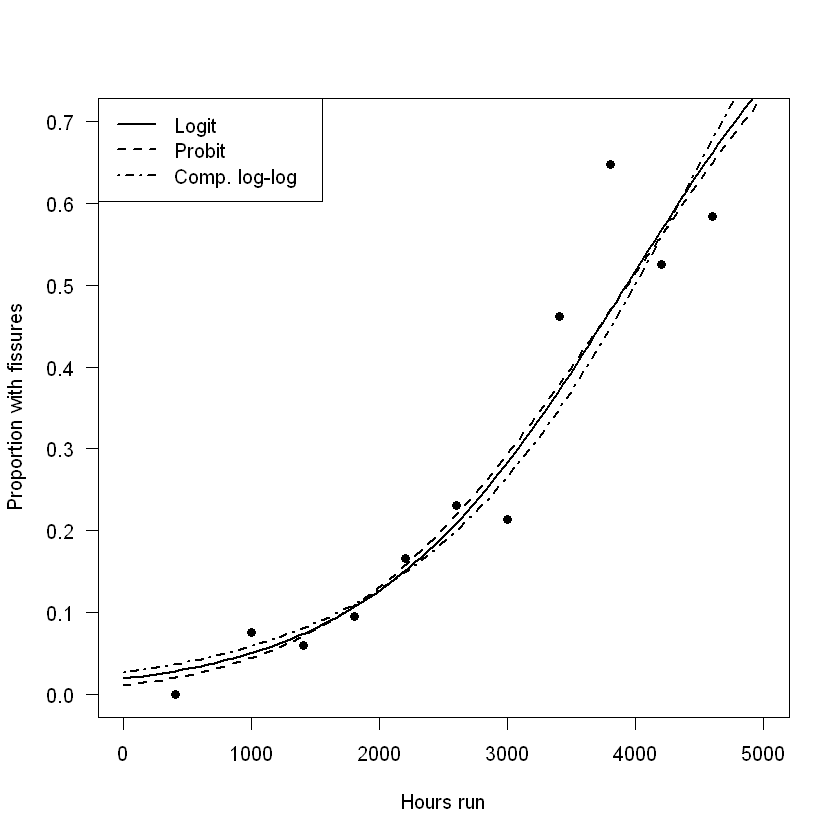

In [17]:
newHrs <- seq( 0, 5000, length=100)
newdf <- data.frame(Hours=newHrs)
newP.logit <- predict( tr.logit, newdata=newdf, type="response")
newP.probit <- predict( tr.probit, newdata=newdf, type="response")
newP.cll <- predict( tr.cll, newdata=newdf, type="response")
plot( Fissures/Turbines ~ Hours, data=turbines, pch=19, las=1,
xlim=c(0, 5000), ylim=c(0, 0.7),
xlab="Hours run", ylab="Proportion with fissures")
lines( newP.logit ~ newHrs, lty=1, lwd=2)
lines(newP.probit ~ newHrs, lty=2, lwd=2)
lines(newP.cll ~ newHrs, lty=4, lwd=2)
legend("topleft", lwd=2, lty=c(1, 2, 4),
legend=c("Logit","Probit","Comp. log-log"))

In [18]:
coef(tr.logit)

(Intercept)         Hours 
-3.9235965551  0.0009992372

In [20]:
LogOdds <- predict( tr.logit )
LogOdds

1          2          3          4          5          6          7 
-3.5239017 -2.9243593 -2.5246644 -2.1249695 -1.7252746 -1.3255798 -0.9258849 
         8          9         10         11 
-0.5261900 -0.1264951  0.2731998  0.6728947

In [21]:
tr.logit$linear.predictor

1          2          3          4          5          6          7 
-3.5239017 -2.9243593 -2.5246644 -2.1249695 -1.7252746 -1.3255798 -0.9258849 
         8          9         10         11 
-0.5261900 -0.1264951  0.2731998  0.6728947

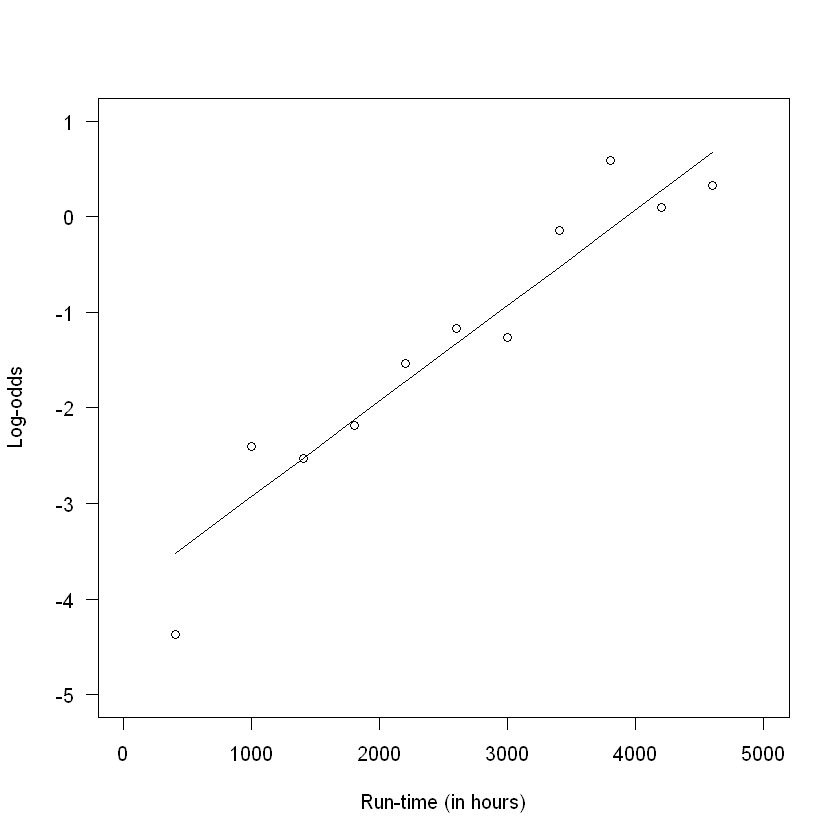

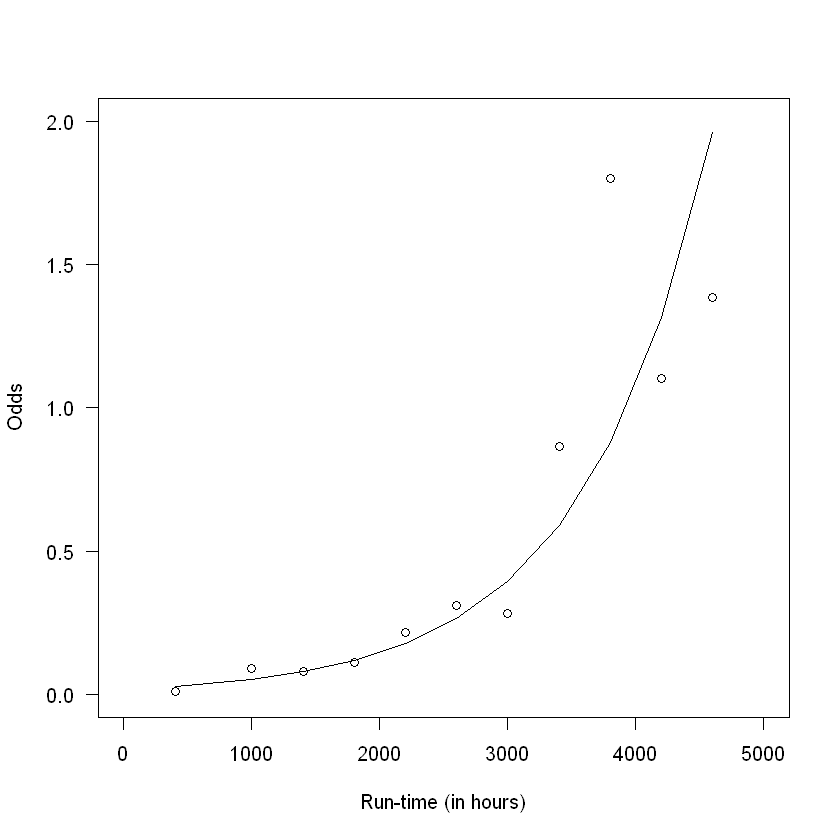

In [24]:
LogOdds <- predict( tr.logit ); odds <- exp( LogOdds )
plot( LogOdds ~ turbines$Hours, type="l", las=1,
xlim=c(0, 5000), ylim=c(-5, 1),
ylab="Log-odds", xlab="Run-time (in hours)" )
my <- turbines$Fissures; m <- turbines$Turbines
EmpiricalOdds <- (my + 0.5)/(m - my + 0.5) # To avoid log of zeros
points( log(EmpiricalOdds) ~ turbines$Hours)
#
plot( odds ~ turbines$Hours, las=1, xlim=c(0, 5000), ylim=c(0, 2),
type="l", ylab="Odds", xlab="Run-time (in hours)")
points( EmpiricalOdds ~ turbines$Hours)

In [25]:
data(germ); str(germ)

'data.frame':	21 obs. of  4 variables:
 $ Germ   : int  10 23 23 26 17 5 53 55 32 46 ...
 $ Total  : int  39 62 81 51 39 6 74 72 51 79 ...
 $ Extract: Factor w/ 2 levels "Bean","Cucumber": 1 1 1 1 1 2 2 2 2 2 ...
 $ Seeds  : Factor w/ 2 levels "OA73","OA75": 2 2 2 2 2 2 2 2 2 2 ...


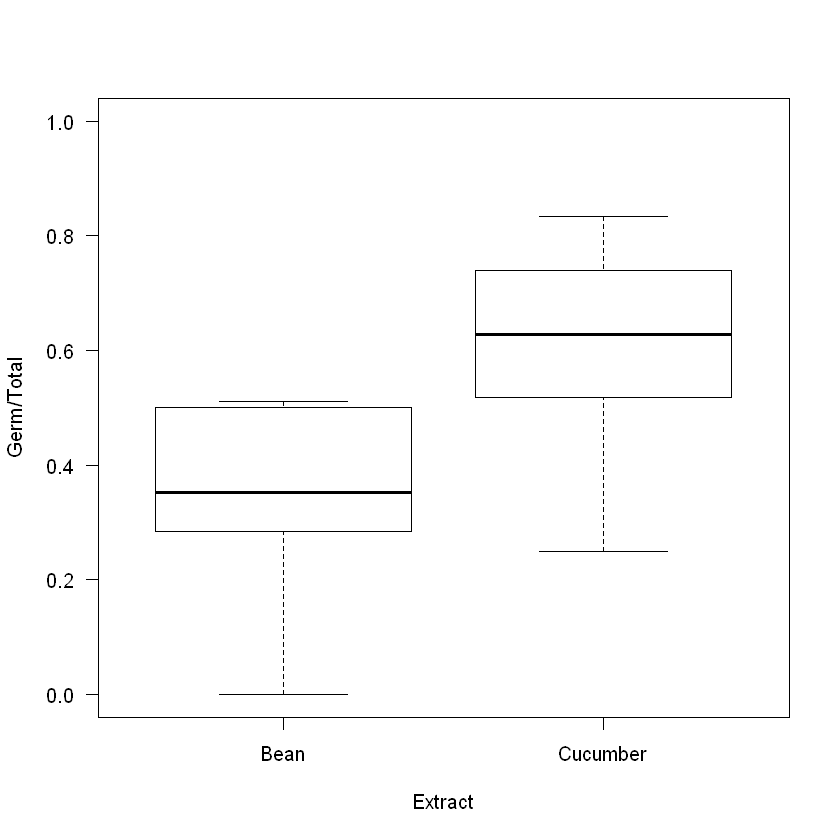

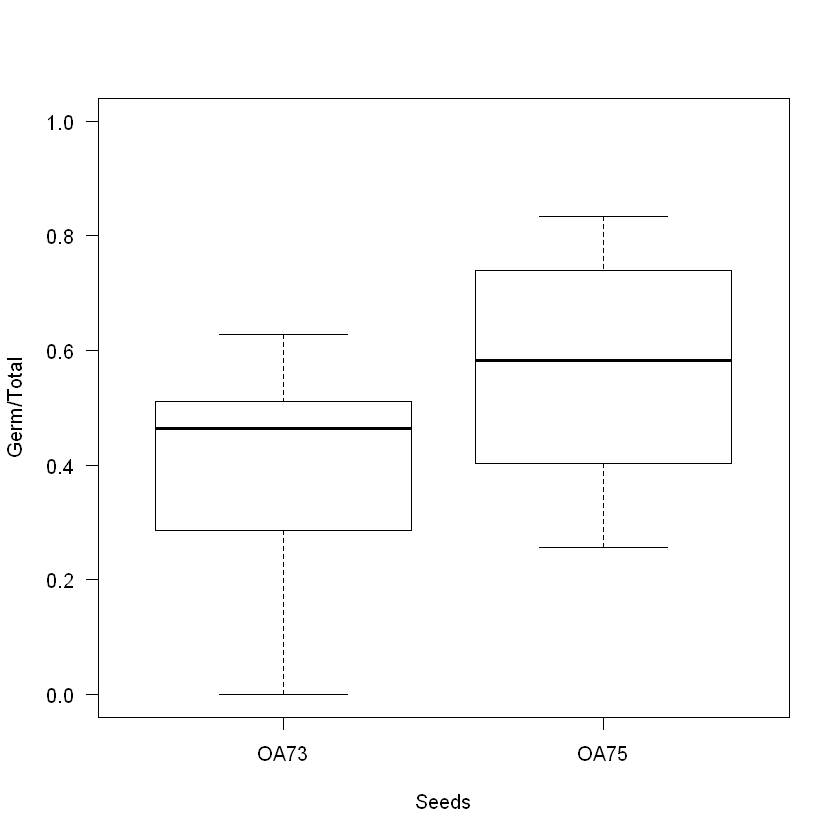

In [26]:
plot( Germ/Total ~ Extract, data=germ, las=1, ylim=c(0, 1) )
plot( Germ/Total ~ Seeds, data=germ, las=1, ylim=c(0, 1) )

In [27]:
gm.m1 <- glm(Germ/Total ~ Seeds + Extract, family=binomial,
data=germ, weights=Total)
printCoefmat(coef(summary(gm.m1)))

                Estimate Std. Error z value  Pr(>|z|)    
(Intercept)     -0.70048    0.15072 -4.6475 3.359e-06 ***
SeedsOA75        0.27045    0.15471  1.7482   0.08044 .  
ExtractCucumber  1.06475    0.14421  7.3831 1.546e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [28]:
exp( coef(gm.m1) )

(Intercept)       SeedsOA75 ExtractCucumber 
      0.4963454       1.3105554       2.9001133

In [29]:
ED50s <- cbind("Logit" = dose.p(tr.logit),
"Probit" = dose.p(tr.probit),
"C-log-log" = dose.p(tr.cll))

In [30]:
ED50s

,Logit,Probit,C-log-log
p = 0.5:,3926.592,3935.197,3993.575


In [31]:
data(mammary); mammary

N.Cells,N.Assays,N.Outgrowths
15,38,3
40,6,6
60,17,13
90,8,6
125,12,9


In [32]:
y <- mammary$N.Outgrowths / mammary$N.Assays
fit <- glm(y~offset(log(N.Cells)), family=binomial(link="cloglog"),
weights=N.Assays, data=mammary)
coef(summary(fit))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-4.163625,0.1744346,-23.86925,6.391454e-126


In [33]:
frequency <- 1/exp(coef(fit)); frequency

(Intercept) 
   64.30418

In [34]:
s <- summary(fit)
Estimate <- s$coef[, "Estimate"]
SE <- s$coef[, "Std. Error"]
z <- qnorm(0.05/2, lower.tail=FALSE)
CI <- c(Lower=Estimate+z*SE, Estimate=Estimate, Upper=Estimate-z*SE)
CI <- 1/exp(CI); round(CI, digits=1)

Lower Estimate    Upper 
    45.7     64.3     90.5

In [36]:
fit1 <- glm(y~log(N.Cells), family=binomial(link="cloglog"),
weights=N.Assays, data=mammary)
anova(fit, fit1, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4,16.85169,NA,NA,NA
3,16.20489,1,0.6468038,0.4212577


In [39]:
c(Df = df.residual( tr.logit ),
Resid.Dev = deviance( tr.logit ),
Pearson.X2 = sum( resid(tr.logit, type="pearson")^2 ))
sum(tr.logit$weights * tr.logit$residuals^2)

Df  Resid.Dev Pearson.X2 
  9.000000  10.331466   9.250839

[1] 9.250839

In [40]:
gm.m1 <- glm( Germ/Total ~ Extract * Seeds, family=binomial,
weights=Total, data=germ )

In [41]:
anova(gm.m1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,20,98.71946,NA
Extract,1,55.968596,19,42.75086,7.363792e-14
Seeds,1,3.064972,18,39.68589,7.999655e-02
Extract:Seeds,1,6.408104,17,33.27779,1.136007e-02


In [42]:
df.residual(gm.m1)

[1] 17

In [43]:
c( deviance(gm.m1), df.residual(gm.m1) )

[1] 33.27779 17.00000

In [44]:
sum( resid(gm.m1, type="pearson")^2 ) # Pearson.X2

[1] 31.65114

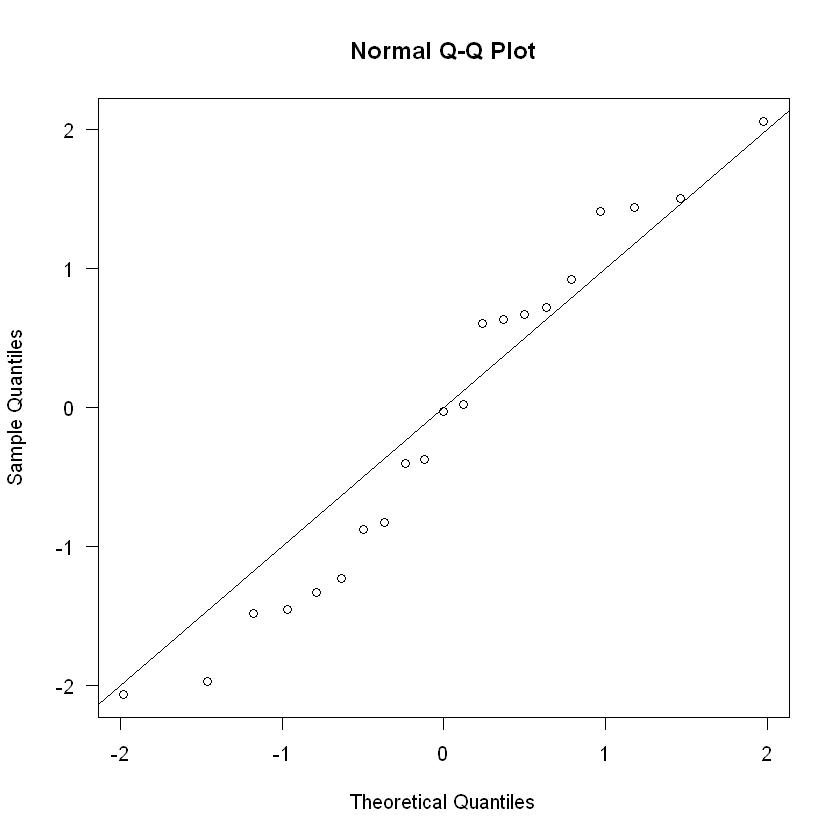

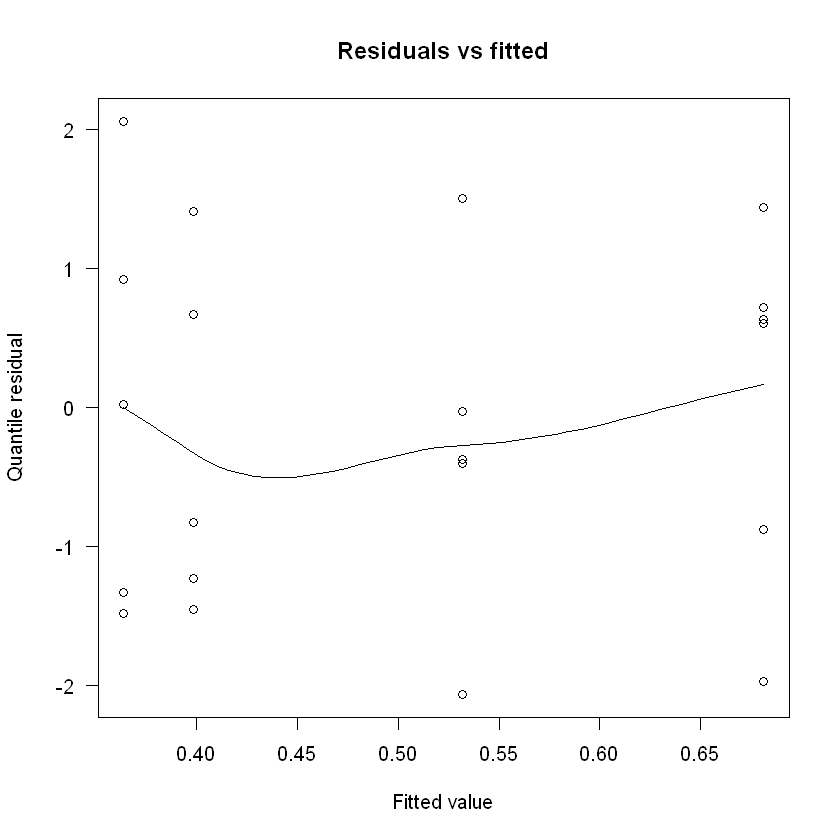

In [46]:
qres <- qresid(gm.m1); qqnorm(qres, las=1); abline(0, 1)
scatter.smooth( qres~fitted(gm.m1), las=1, main="Residuals vs fitted",
xlab="Fitted value", ylab="Quantile residual")

In [47]:
qres[c(6, 16)]

[1]  0.6305798 -1.4569599

In [48]:
gm.od <- update(gm.m1, family=quasibinomial)
anova(gm.od, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,20,98.71946,NA,NA
Extract,1,55.968596,19,42.75086,30.061033,4.042898e-05
Seeds,1,3.064972,18,39.68589,1.646213,2.166920e-01
Extract:Seeds,1,6.408104,17,33.27779,3.441827,8.099068e-02


In [49]:
sqrt(summary(gm.od)$dispersion)

[1] 1.36449

In [51]:
beta <- coef(summary(gm.m1))[,"Estimate"]
m1.se <- coef(summary(gm.m1))[,"Std. Error"]
od.se <- coef(summary(gm.od))[,"Std. Error"]
data.frame(Estimate=beta, Binom.SE=m1.se,
Quasi.SE=od.se, Ratio=od.se/m1.se)

,Estimate,Binom.SE,Quasi.SE,Ratio
(Intercept),-0.4122448,0.1841784,0.2513095,1.36449
ExtractCucumber,0.5400782,0.2498130,0.3408672,1.36449
SeedsOA75,-0.1459269,0.2231659,0.3045076,1.36449
ExtractCucumber:SeedsOA75,0.7781037,0.3064332,0.4181249,1.36449


In [53]:
data(nminer); Eucs15 <- nminer$Eucs>15
m1 <- glm(Miners ~ Eucs15, data=nminer, family=binomial)
printCoefmat(coef(summary(m1)))

              Estimate Std. Error z value Pr(>|z|)  
(Intercept)   -0.84730    0.48795 -1.7364  0.08249 .
Eucs15TRUE    20.41337 3242.45694  0.0063  0.99498  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [54]:
anova(m1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,30,42.68435,NA
Eucs15,1,18.24978,29,24.43457,1.937488e-05


In [55]:
m0 <- glm(Miners ~ 1, data=nminer, family=binomial)
z.score <- glm.scoretest(m0, Eucs15)
P.score <- 2*(1-pnorm(abs(z.score))); c(z.score, P.score)

[1] 3.7471727820 0.0001788389

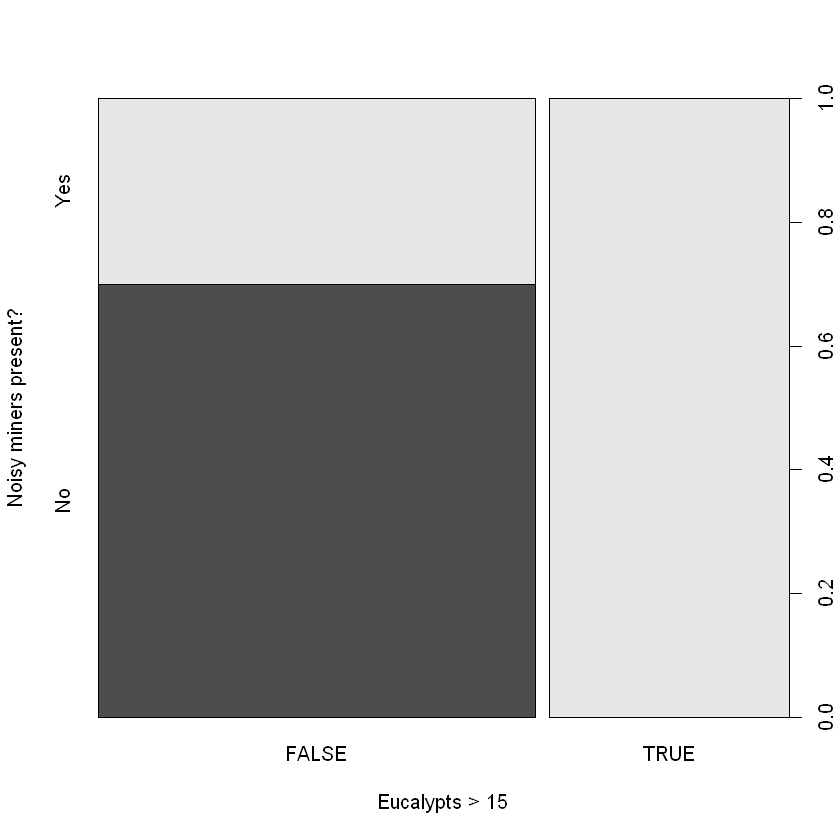

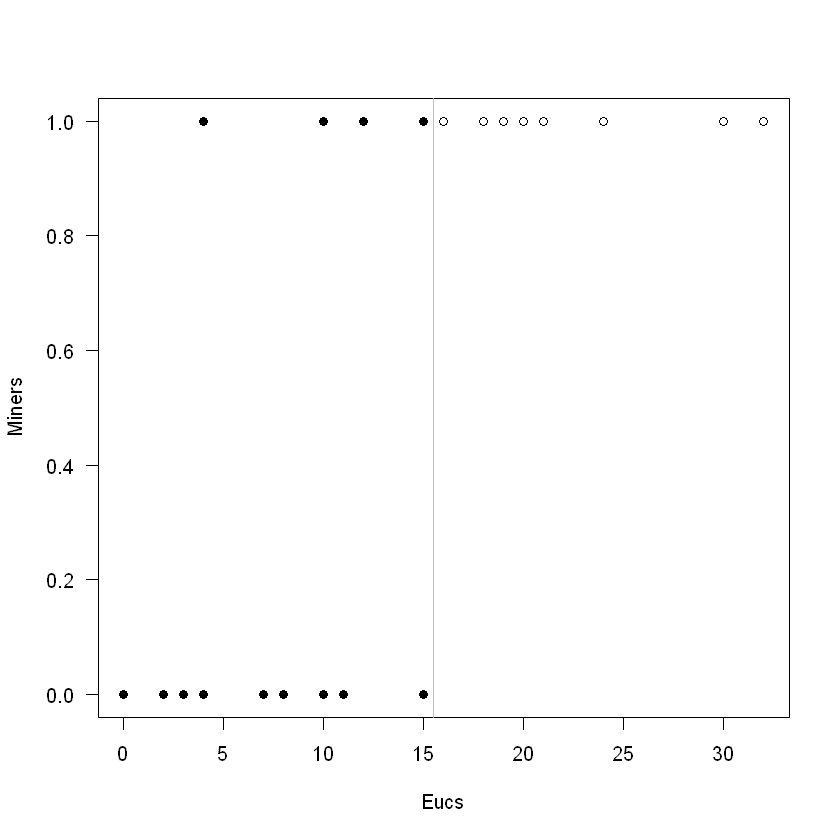

In [56]:
plot( factor(Miners, labels=c("No","Yes")) ~ factor(Eucs15), las=1,
ylab="Noisy miners present?", xlab="Eucalypts > 15", data=nminer)
plot( Miners ~ Eucs, pch=ifelse(Eucs15, 1, 19), data=nminer, las=1)
abline(v=15.5, col="gray")

In [57]:
tapply(fitted(m1), Eucs15, mean)

FALSE  TRUE 
  0.3   1.0

In [58]:
data(deposit); str(deposit)

'data.frame':	18 obs. of  4 variables:
 $ Killed     : int  3 5 19 19 24 35 2 14 20 27 ...
 $ Number     : int  50 49 47 38 29 50 50 49 50 50 ...
 $ Insecticide: Factor w/ 3 levels "A","B","C": 1 1 1 1 1 1 2 2 2 2 ...
 $ Deposit    : num  2 2.64 3.48 4.59 6.06 8 2 2.64 3.48 4.59 ...


In [60]:
deposit$Prop <- deposit$Killed / deposit$Number

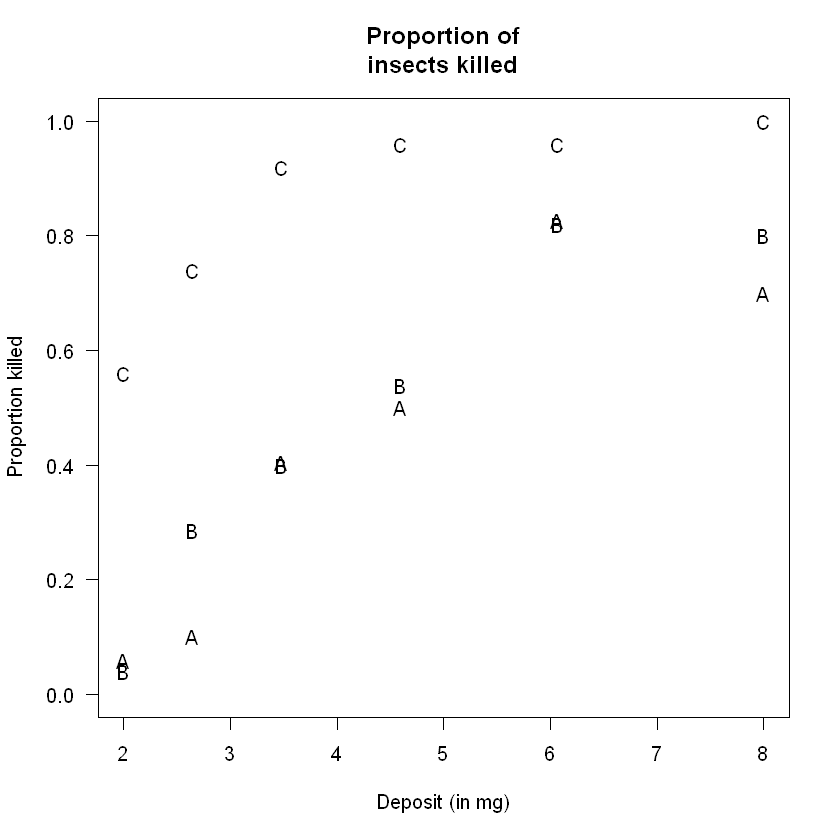

In [62]:
plot( Prop ~ Deposit, type="n", las=1, ylim=c(0, 1),
data=deposit, main="Proportion of\ninsects killed",
xlab="Deposit (in mg)", ylab="Proportion killed")
points( Prop ~ Deposit, pch="A", subset=(Insecticide=="A"), data=deposit)
points( Prop ~ Deposit, pch="B", subset=(Insecticide=="B"), data=deposit)
points( Prop ~ Deposit, pch="C", subset=(Insecticide=="C"), data=deposit)

In [63]:
ins.m1 <- glm(Killed/Number ~ Deposit + Insecticide,
family = binomial, weights = Number, data = deposit)

In [64]:
coef(ins.m1)

(Intercept)      Deposit InsecticideB InsecticideC 
  -3.2213638    0.6316762    0.3695267    2.6880162

In [66]:
newD <- seq( min(deposit$Deposit), max(deposit$Deposit), length=100)
newProp.logA <- predict(ins.m1, type="response", newdata=data.frame(Deposit=newD, Insecticide="A") )
newProp.logB <- predict(ins.m1, type="response", newdata=data.frame(Deposit=newD, Insecticide="B") )
newProp.logC <- predict(ins.m1, type="response", newdata=data.frame(Deposit=newD, Insecticide="C") )
lines( newProp.logA ~ newD, lty=1);
lines( newProp.logB ~ newD, lty=2)
lines( newProp.logC ~ newD, lty=3)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


In [67]:
dose.p(ins.m1, c(1, 2))

             Dose        SE
p = 0.5: 5.099708 0.2468085

In [68]:
ins.m1A <- update( ins.m1, .~. - 1) 

In [69]:
coef( ins.m1A )

Deposit InsecticideA InsecticideB InsecticideC 
   0.6316762   -3.2213638   -2.8518371   -0.5333477

In [70]:
ED50s <- cbind( dose.p(ins.m1A, c(2, 1)), dose.p(ins.m1A, c(3, 1)),
dose.p(ins.m1A, c(4, 1)) )

In [71]:
colnames(ED50s) <- c("Insect. A","Insect. B", "Insect. C"); ED50s

,Insect. A,Insect. B,Insect. C
p = 0.5:,5.099708,4.514714,0.8443372


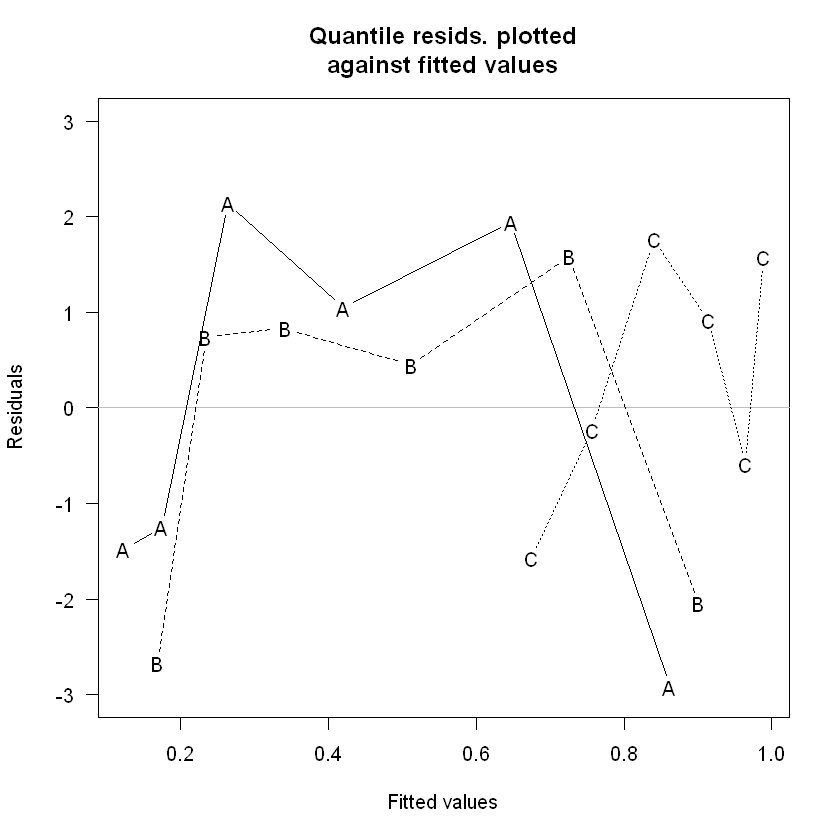

In [72]:
plot( qresid(ins.m1) ~ fitted(ins.m1), type="n", las=1, ylim=c(-3, 3),
main="Quantile resids. plotted\nagainst fitted values",
xlab="Fitted values", ylab="Residuals")
abline(h = 0, col="grey")
points( qresid(ins.m1) ~ fitted(ins.m1), pch="A", type="b", lty=1,
subset=(deposit$Insecticide=="A") )
points( qresid(ins.m1) ~ fitted(ins.m1), pch="B", type="b", lty=2,
subset=(deposit$Insecticide=="B") )
points( qresid(ins.m1) ~ fitted(ins.m1), pch="C", type="b", lty=3,
subset=(deposit$Insecticide=="C"))

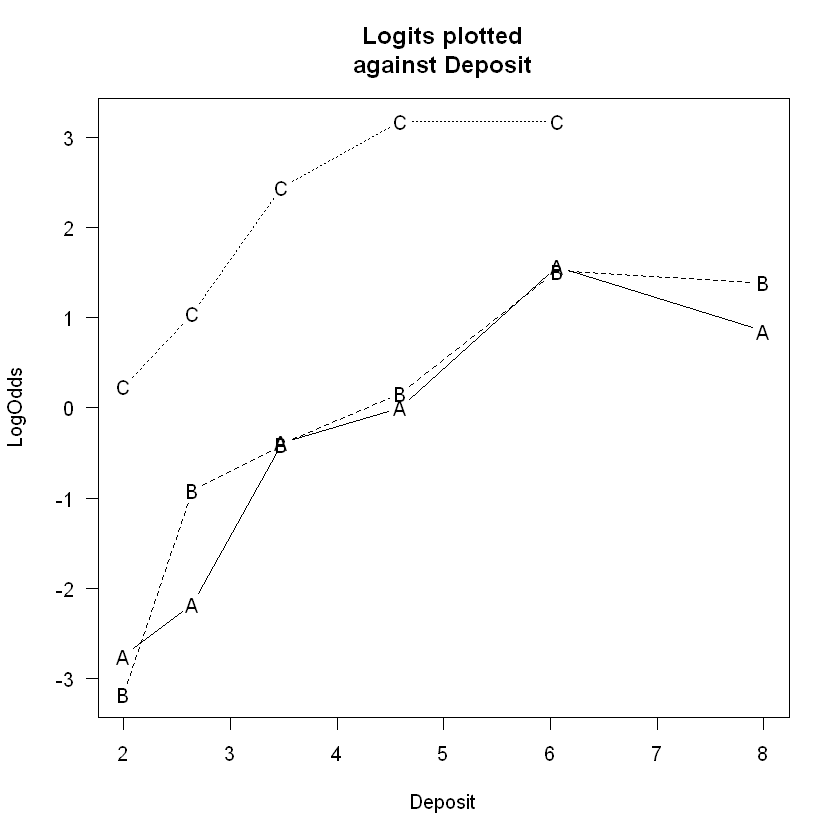

In [73]:
LogOdds <- with(deposit, log(Prop/(1-Prop)) )
plot( LogOdds ~ Deposit, type="n", xlab="Deposit", data=deposit,
main="Logits plotted\nagainst Deposit", las=1)
points( LogOdds ~ Deposit, pch="A", type="b", lty=1,
data=deposit, subset=(Insecticide=="A") )
points( LogOdds ~ Deposit, pch="B", type="b", lty=2,
data=deposit, subset=(Insecticide=="B") )
points( LogOdds ~ Deposit, pch="C", type="b", lty=3,
data=deposit, subset=(Insecticide=="C") )

In [74]:
deposit$logDep <- log( deposit$Deposit )
ins.m2 <- glm(Killed/Number ~ logDep + Insecticide - 1,
family = binomial, weights = Number, data = deposit)

In [75]:
ED50s <- cbind( dose.p(ins.m2, c(2, 1)), dose.p(ins.m2, c(3, 1)),
dose.p(ins.m2, c(4, 1)) )

In [76]:
colnames(ED50s) <- c("Insect. A","Insect. B", "Insect. C"); exp(ED50s)

,Insect. A,Insect. B,Insect. C
p = 0.5:,4.688232,4.154625,1.753202


In [77]:
ins.m3 <- glm(Killed/Number ~ poly(logDep, 2) + Insecticide,
family = binomial, weights = Number, data = deposit)

In [78]:
anova( ins.m2, ins.m3, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
14,23.38522,NA,NA,NA
13,15.09036,1,8.294865,0.003975734


In [79]:
newD <- seq( min(deposit$logDep), max(deposit$logDep), length=200)
newProp4.logA <- predict(ins.m3, type="response",
newdata=data.frame(logDep=newD, Insecticide="A") )
newProp4.logB <- predict(ins.m3, type="response",
newdata=data.frame(logDep=newD, Insecticide="B") )
newProp4.logC <- predict(ins.m3, type="response",
newdata=data.frame(logDep=newD, Insecticide="C") )
lines( newProp4.logA ~ newD, lty=1); lines( newProp4.logB ~ newD, lty=2)
lines( newProp4.logC ~ newD, lty=3)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


In [80]:
c( deviance( ins.m3 ), df.residual( ins.m3 ) )

[1] 15.09036 13.00000

In [81]:
c( min( deposit$Killed ), min( deposit$Number - deposit$Killed) )

[1] 2 0